Hello and Greetings!
This code contains enviroment, algorithm and policy extraction for open AI gym frozen lake environment!
You can get more example and info from open ai gym library at https://www.gymlibrary.dev/
I have used the frozen lake environment which you can have a look at https://www.gymlibrary.dev/environments/toy_text/frozen_lake/
There are also two algorithms to solve this problem: 1- value iteration method, 2- Q-learning method
They both contain training using gym envinroment in addition to test and policy extraction!

Best wishes 
Amir Hossein Nourian 
ahn.paf@gmail.com

Making gym environment (default environment):

In [21]:
# frozen-lake-ex1.py
import gym # loading the Gym library
 
env = gym.make("FrozenLake8x8-v1",render_mode="human",is_slippery=False)
#env = gym.make("FrozenLake8x8-v1",is_slippery=False)
env.reset()                    
#env.render()

(0, {'prob': 1})

Making gym environment (4x4 environment):

In [15]:
import gym
m_44 =[
    "SFFF",
    "HHFH",
    "FHFF",
    "FFFG",
] 

env = gym.make("FrozenLake-v1",desc=m_44,map_name="4x4",is_slippery=False)

# env1

import gym
m_44_1 =[
    "SFFF",
    "FFFF",
    "FFFF",
    "FFFG",
] 

env1 = gym.make("FrozenLake-v1",desc=m_44_1,map_name="4x4",is_slippery=False)



In [2]:
import gym

#1

m_66_1 =[
    "SFFFFF",
    "FFFFFF",
    "FFFFFF",
    "FFFFFF",
    "FFFFFF",
    "FFFFFG",
] 

env1 = gym.make("FrozenLake-v1",desc=m_66_1,map_name="6x6",is_slippery=False)

#2

m_66_2 =[
    "SFFFFF",
    "HHHHHF",
    "FFFFFF",
    "FHHHHH",
    "FFFFFF",
    "HHHHHG",
] 

env2 = gym.make("FrozenLake-v1",desc=m_66_2,map_name="6x6",is_slippery=False)

#3

m_66_3 =[
    "SFFFFF",
    "FHFHFH",
    "FFFFFF",
    "FHFHFH",
    "FFFFFF",
    "FHFHFG",
] 

env3 = gym.make("FrozenLake-v1",desc=m_66_3,map_name="6x6",is_slippery=False)


#4

m_66_4 =[
    "SFFFFF",
    "FHFHFH",
    "FFFFFF",
    "HHHHHF",
    "FFFFFF",
    "FHFHFG",
] 

env4 = gym.make("FrozenLake-v1",desc=m_66_4,map_name="6x6",is_slippery=False)

#5 

m_66_5 =[
    "SFFFFF",
    "FHFHFH",
    "FFFFFF",
    "FHHHHF",
    "FFFFFF",
    "FHFHFG",
] 

env5 = gym.make("FrozenLake-v1",desc=m_66_5,map_name="6x6",is_slippery=False)

#6

m_66_6 =[
    "SFFFFF",
    "HFFFFH",
    "HFHHFH",
    "HFHHFH",
    "HFFFFF",
    "HHHHHG",
] 

env6 = gym.make("FrozenLake-v1",desc=m_66_6,map_name="6x6",is_slippery=False)


Making gym environment (8x8 environment):

In [41]:
import gym
m_88 =[
    "SFFFFFFF",
    "FFFFFFFF",
    "FFFFFFFF",
    "FFFFFHFF",
    "FFFHFFFF",
    "FHHFFFHF",
    "FHFFHFHF",
    "FFFHFFFG",
] 

env = gym.make("FrozenLake-v1",desc=m_88,map_name="8x8",render_mode="human",is_slippery=False)

Making gym environment (16x16 environment):

In [27]:
import gym
m_88 =[
    "SFFFFFFFFF",
    "FFFFFFFFFF",
    "FFFFFFFFFF",
    "FFFFFHFFFF",
    "FFFHFFFFFF",
    "FHHFFFHFFF",
    "FHFFHFHFFF",
    "FFFHFFFGFF",
] 
# in case you need rendering
# env = gym.make("FrozenLake-v1",desc=m_88,map_name="10x10",render_mode="human",is_slippery=False)
# omitting the rendering part
env = gym.make("FrozenLake-v1",desc=m_88,map_name="10x10",is_slippery=False)

Rendering environment:

In [42]:
env.reset()
env.render()

Close Environment:

In [19]:
env.close()
env1.close()
env2.close()
env3.close()
env4.close()
env5.close()
env6.close()


NameError: name 'env2' is not defined

In [2]:
# frozen-lake-ex1.py
print("Action space: ", env.action_space)
print("Observation space: ", env.observation_space)

Action space:  Discrete(4)
Observation space:  Discrete(64)


Gym environment output check:

In [2]:
MAX_ITERATIONS = 10
env.reset()
#env.render()
for i in range(MAX_ITERATIONS):
    random_action = env.action_space.sample()
    new_state, reward, done, info, dep= env.step(random_action)
    print(new_state, reward, done, info, dep)
    #env.render()
    if done:
        break

1 0.0 False False {'prob': 1.0}
1 0.0 False False {'prob': 1.0}
0 0.0 False False {'prob': 1.0}
4 0.0 False False {'prob': 1.0}
4 0.0 False False {'prob': 1.0}
0 0.0 False False {'prob': 1.0}
0 0.0 False False {'prob': 1.0}
1 0.0 False False {'prob': 1.0}
5 0.0 True False {'prob': 1.0}


Setting action space env size:

In [3]:
env.action_space
env.nS = env.observation_space.n
env.nA = env.action_space.n 

In [30]:
env.P[0]

{0: [(1.0, 0, 0.0, False)],
 1: [(1.0, 10, 0.0, False)],
 2: [(1.0, 1, 0.0, False)],
 3: [(1.0, 0, 0.0, False)]}

Value iteration 

In [2]:
import numpy as np

def value_iteration(env, max_iterations=100000, lmbda=0.9):
  env.nS = env.observation_space.n
  env.nA = env.action_space.n 
  stateValue = [0 for i in range(env.nS)]
  newStateValue = stateValue.copy()
  for i in range(max_iterations):
    for state in range(env.nS):
      action_values = []      
      for action in range(env.nA):
        state_value = 0
        for i in range(len(env.P[state][action])):
          new_var = env.P[state][action][i]
          prob, next_state, reward, done = new_var
          state_action_value = prob * (reward + lmbda*stateValue[next_state])
          state_value += state_action_value
        action_values.append(state_value)      #the value of each action
        best_action = np.argmax(np.asarray(action_values))   # choose the action which gives the maximum value
        newStateValue[state] = action_values[best_action]  #update the value of the state
    if i > 1000: 
      if sum(stateValue) - sum(newStateValue) < 1e-04:   # if there is negligible difference break the loop
        break
        print(i)
    else:
      stateValue = newStateValue.copy()
  print(i)
  return stateValue 

In [3]:
env.reset()
statevalue = value_iteration(env)

0


In [4]:

#env.action_space.n
statevalue


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7290000000000001,
 0.0,
 0.0,
 1.0,
 0.81,
 0.9,
 1.0,
 0.0]

Getting policy for Value iteration algorithm:

In [6]:
def get_policy(env,stateValue, lmbda=0.9):
  policy = [0 for i in range(env.nS)]
  for state in range(env.nS):
    action_values = []
    for action in range(env.nA):
      action_value = 0
      for i in range(len(env.P[state][action])):
        prob, next_state, r, _ = env.P[state][action][i]
        action_value += prob * (r + lmbda * stateValue[next_state])
      action_values.append(action_value)
    best_action = np.argmax(np.asarray(action_values))
    policy[state] = best_action
  return policy 

In [8]:
policy = get_policy(env, statevalue)
policy

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0]

In [9]:
policy
#policy[1]
#x_1,x_2,x_3,x_4,x_5 =env.step(1)
#print(x_1,x_2,x_3,x_4,x_5)
#policy
#observation = env.reset
#policy[:]
statevalue

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7290000000000001,
 0.0,
 0.0,
 1.0,
 0.81,
 0.9,
 1.0,
 0.0]

Calculating score:

In [11]:
def get_score(env, policy, episodes=10):
  misses = 0
  steps_list = []
  for episode in range(episodes):
    observations = env.reset()
    observation = observations[0]
    steps=0
    while True:
      
      action = policy[observation]
      observation, reward, done, trunc, info = env.step(action)
      steps+=1
      if done and reward == 1:
        # print('You have got the fucking Frisbee after {} steps'.format(steps))
        steps_list.append(steps)
        break
      elif done and reward == 0:
        # print("You fell in a hole!")
        misses += 1
        break
  print('----------------------------------------------')
  print('You took an average of {:.0f} steps to get the frisbee'.format(np.mean(steps_list)))
  print('And you fell in the hole {:.2f} % of the times'.format((misses/episodes) * 100))
  print('----------------------------------------------')

In [12]:
get_score(env, policy)

KeyboardInterrupt: 

In [3]:
import numpy as np
import gym
import random
def qlearning(env,total_episodes):
    action_size = env.action_space.n
    state_size = env.observation_space.n
    qtable = np.zeros((state_size, action_size))
    #total_episodes = 100000        # Total episodes
    learning_rate = 0.9           # Learning rate
    max_steps = 99                # Max steps per episode
    gamma = 0.95                  # Discounting rate

    # Exploration parameters
    epsilon = 1                # Exploration rate
    max_epsilon = 1.0             # Exploration probability at start
    min_epsilon = 0.01            # Minimum exploration probability 
    decay_rate = 1/total_episodes             # Exponential decay rate for exploration prob
    # List of rewards
    rewards = []
    # 2 For life or until learning is stopped
    for episode in range(total_episodes):
        # Reset the environment
        state_reset = env.reset()
        state = state_reset[0]
        #print(state)
        step = 0
        done = False
        total_rewards = 0
        
        for step in range(max_steps):
            # 3. Choose an action a in the current world state (s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0, 1)
            #print(exp_exp_tradeoff)
            ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice --> exploration
            else:
                action = env.action_space.sample()
                #print(action)

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, trunc, info = env.step(action)

            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            # qtable[new_state,:] : all the actions we can take from new state
            #print(state,action,reward)
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
            
            total_rewards += reward
            
            # Our new state is state
            state = new_state
            
            # If done (if we're dead) : finish episode
            if done == True: 
                break
            
        episode += 1
        # Reduce epsilon (because we need less and less exploration)
        
        #epsilon = epsilon*decay
        #epsilon = epsilon*0.999999
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
        rewards.append(total_rewards)

    #print ("Score over time: " +  str(sum(rewards)/total_episodes))
    #print(episode)
    return(qtable)

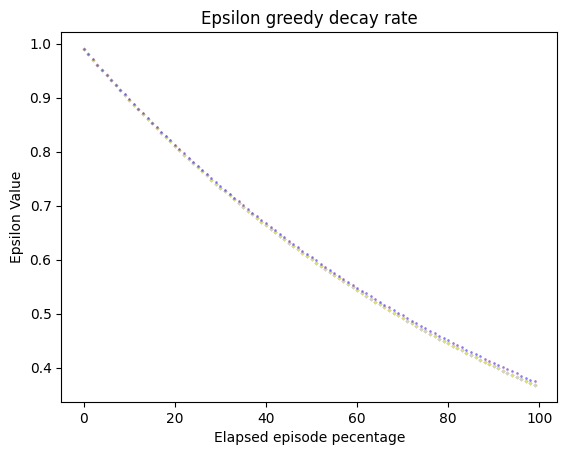

In [55]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


# Exploration parameters
epsilon = 1                # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
           # Exponential decay rate for exploration pro
ep = 0
data_collection_rate = 100
d = 1
epfun1 = epsilon
epfun2 = epsilon
epfun1list = []
epfun2list = []
total_ep = 10000
decay_rate = 1/total_ep
while ep<total_ep:
    ep = ep + 1
    epfun1 = epfun1*0.9999
    epfun2 = epfun2 = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*ep)
    if ep == ((total_ep)/(data_collection_rate))*d:
        epfun1list.append(epfun1)
        epfun2list.append(epfun2)
        d = d + 1
#print(epfun1list)
epfun1array = np.array(epfun1list)
epfun2array = np.array(epfun2list)
ep_array = np.array(list(range(0,data_collection_rate)))
#print(epfun1array)
#print(ep_array)

plt.scatter(ep_array,epfun1array,c='y',edgecolor ="blue",linewidths=0.1,marker='D',s=4,alpha=0.5)
plt.scatter(ep_array,epfun2array,c='b',edgecolor ="red",linewidths=0.1,marker='p',s=4, alpha=0.5)

plt.title('Epsilon greedy decay rate')
plt.xlabel('Elapsed episode pecentage')
plt.ylabel('Epsilon Value')

plt.show()

In [11]:
qtable = qlearning (env6,100000)
print(qtable)

[[0.59873694 0.         0.63024941 0.59873694]
 [0.59873694 0.66342043 0.66342043 0.63024941]
 [0.63024941 0.6983373  0.6983373  0.66342043]
 [0.66342043 0.73509189 0.73509189 0.6983373 ]
 [0.6983373  0.77378094 0.6983373  0.73509189]
 [0.73509189 0.         0.6983373  0.6983373 ]
 [0.         0.         0.         0.        ]
 [0.         0.6983373  0.6983373  0.63024941]
 [0.66342043 0.         0.73509189 0.66342043]
 [0.6983373  0.         0.77378094 0.6983373 ]
 [0.73509189 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.73509189 0.         0.66342043]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.857375   0.         0.77378094]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.77378094 0.         0.6983373 ]
 [0.         0.         0.         0.        ]
 [0.         

In [43]:
qtable = qlearning(env)
meshing = 1
if np.argmax(qtable) == 0:
    meshing = 0
    print('***The mesh must be more dense***')
else:
    print('***The mesh is ok***')
print('*** so meshing parameter is',meshing,'***')

Score over time: 0.01325
100000
***The mesh is ok***
*** so meshing parameter is 1 ***


In [11]:
meshing = 0
if np.argmax(qtable) == 0:
    meshing = 1
    print('The mesh must be larger')
print(meshing) 

The mesh must be larger
1


Q-learning implementation and rendering:

In [12]:
def Q_moving_check(env,qtable, number_of_episodes):

    env.reset()
    max_steps = 16
    for episode in range(number_of_episodes):
        state = env.reset()
        state = state[0]
        step = 0
        done = False
        #print("****************************************************")
        #print("EPISODE ", episode)
        #print(state)
        for step in range(max_steps):
            # env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])
            #print(action)
            new_state, reward, done, trunc, info = env.step(action)
            if done:
                if reward == 1:
                    return(reward)
                else:
                    reward = 0
                    return(reward)
                #print('epis length',step)
                #print('reward',reward)
                break
            if step == max_steps:
                reward = 0
                return(reward) 

            state = new_state

In [13]:
Q_moving_check(env6,qtable,1)

1.0

In [14]:
import numpy as np
def q_performance(env,max_ep,data_collect,points_distance_accordingtodatacollect):
    ep = 0
    #success_list = np.array(list(range(0,data_collect)))
    success_list = np.array([])
    while ep<max_ep:
        rewards = 0 # total rewards per data collection section
        success_rate = 0 # success rate in each data sampling session 
        ep_it = int(data_collect/points_distance_accordingtodatacollect) # number of test points in each data collection session
        for s in range(ep_it): 
            ep = ep + points_distance_accordingtodatacollect # iteration through max episodes
            qtable = qlearning (env,ep)
            reward = Q_moving_check(env,qtable,1) or 0
            rewards +=  reward
        success_rate = rewards/ep_it
        success_list = np.append(success_list, success_rate) # you have to make a list which each element is average eward per data collect
        #return success_list
    return success_list


            


Performance test for one 4x4 map

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl



data_collect = 500 # data collection rate
max_ep = 5000 # max episode for performance check
points_distance_accordingtodatacollect = 10 # how many points calculated in data collect session to reduce calculation costs 
# final average is based on this number


## performance check based on elapsed episodes (training)

success_list = q_performance(env1,max_ep,data_collect,points_distance_accordingtodatacollect)
success_list_1 = q_performance(env2,max_ep,data_collect,points_distance_accordingtodatacollect)

## ploting the data

data_points = max_ep/data_collect
data_points_array = np.array(list(range(0,int(data_points))))

print(data_points_array,success_list)

fig, ax = plt.subplots()

plt.scatter(data_points_array,success_list,c='b',edgecolor ="red",linewidths=0.5,marker='p',s=10, alpha=0.7,label='Env1')
plt.scatter(data_points_array,success_list_1,c='r',edgecolor ="red",linewidths=0.5,marker='p',s=10, alpha=0.7,label='Env2')

plt.title('Performance check for')
plt.xlabel('Elapsed episode pecentage')
plt.ylabel('Performance per data collect rate')

leg = ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Different maps')
plt.show()


KeyboardInterrupt: 

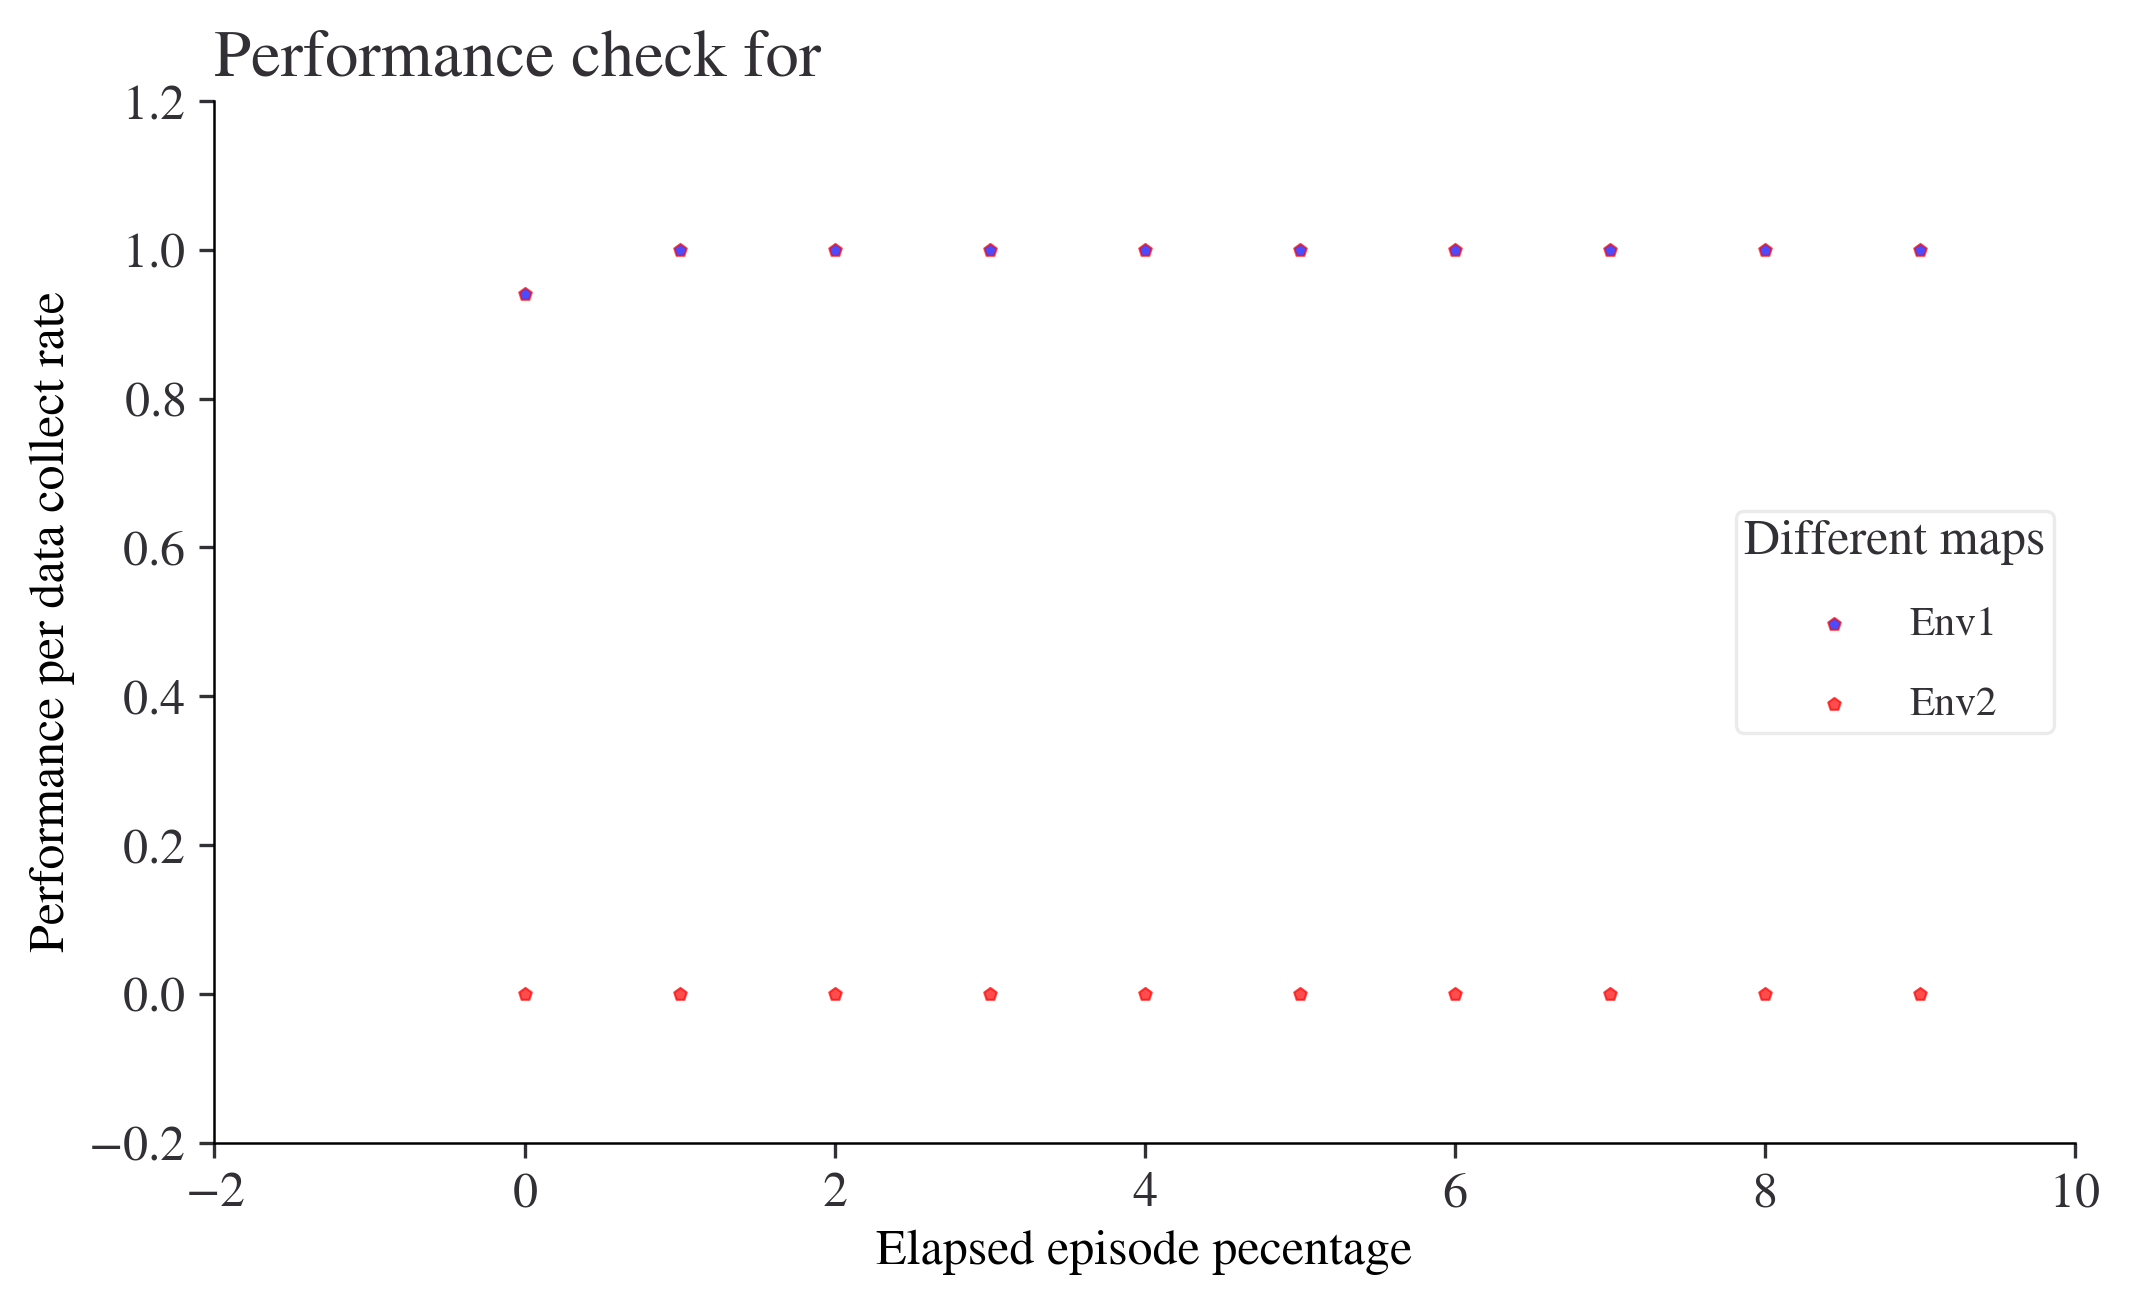

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('plot_style.txt')

fig, ax = plt.subplots()

plt.scatter(data_points_array,success_list,c='b',edgecolor ="red",linewidths=0.5,marker='p',s=10, alpha=0.7,label='Env1')
plt.scatter(data_points_array,success_list_1,c='r',edgecolor ="red",linewidths=0.5,marker='p',s=10, alpha=0.7,label='Env2')

plt.title('Performance check for')
plt.xlabel('Elapsed episode pecentage')
plt.ylabel('Performance per data collect rate')

leg = ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Different maps')
plt.show()

Performance test for 6 maps 6x6 map with close comparison

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl


# 100000 50 data sets
# 2000 average for 50 points
# 40 points distance between each sample 


data_collect = 500 # data collection rate
max_ep = 5000 # max episode for performance check
points_distance_accordingtodatacollect = 10 # how many points calculated in data collect session to reduce calculation costs 
# final average is based on this number

## performance check based on elapsed episodes (training)

success_list_1 = q_performance(env1,max_ep,data_collect,points_distance_accordingtodatacollect)
print('Env1 done')
success_list_2 = q_performance(env2,max_ep,data_collect,points_distance_accordingtodatacollect)
print('Env2 done')
success_list_3 = q_performance(env3,max_ep,data_collect,points_distance_accordingtodatacollect)
print('Env3 done')
success_list_4 = q_performance(env4,max_ep,data_collect,points_distance_accordingtodatacollect)
print('Env4 done')
success_list_5 = q_performance(env5,max_ep,data_collect,points_distance_accordingtodatacollect)
print('Env5 done')
success_list_6 = q_performance(env6,max_ep,data_collect,points_distance_accordingtodatacollect)
print('Env6 done')

## ploting the data

data_points = max_ep/data_collect
data_points_array = np.array(list(range(0,int(data_points))))


fig, ax = plt.subplots()

plt.scatter(data_points_array,success_list_1,c='C1',edgecolor ="red",linewidths=0.1,marker='o',s=10, alpha=0.5,label='Env1')
plt.scatter(data_points_array,success_list_2,c='C2',edgecolor ="red",linewidths=0.1,marker='s',s=10, alpha=0.5,label='Env2')
plt.scatter(data_points_array,success_list_3,c='C3',edgecolor ="red",linewidths=0.1,marker='X',s=10, alpha=0.5,label='Env3')
plt.scatter(data_points_array,success_list_4,c='C4',edgecolor ="red",linewidths=0.1,marker='D',s=10, alpha=0.5,label='Env4')
plt.scatter(data_points_array,success_list_5,c='C5',edgecolor ="red",linewidths=0.1,marker='p',s=10, alpha=0.5,label='Env5')
plt.scatter(data_points_array,success_list_6,c='C6',edgecolor ="red",linewidths=0.1,marker='*',s=10, alpha=0.5,label='Env6')

plt.title('Performance check for')
plt.xlabel('Elapsed episode pecentage')
plt.ylabel('Performance per data collect rate')

leg = ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Different maps')
plt.show()

Env1 done
Env2 done
Env3 done
Env4 done
Env5 done
Env6 done


NameError: name 'success_list' is not defined

In [29]:
success_list_1

array([0.98, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

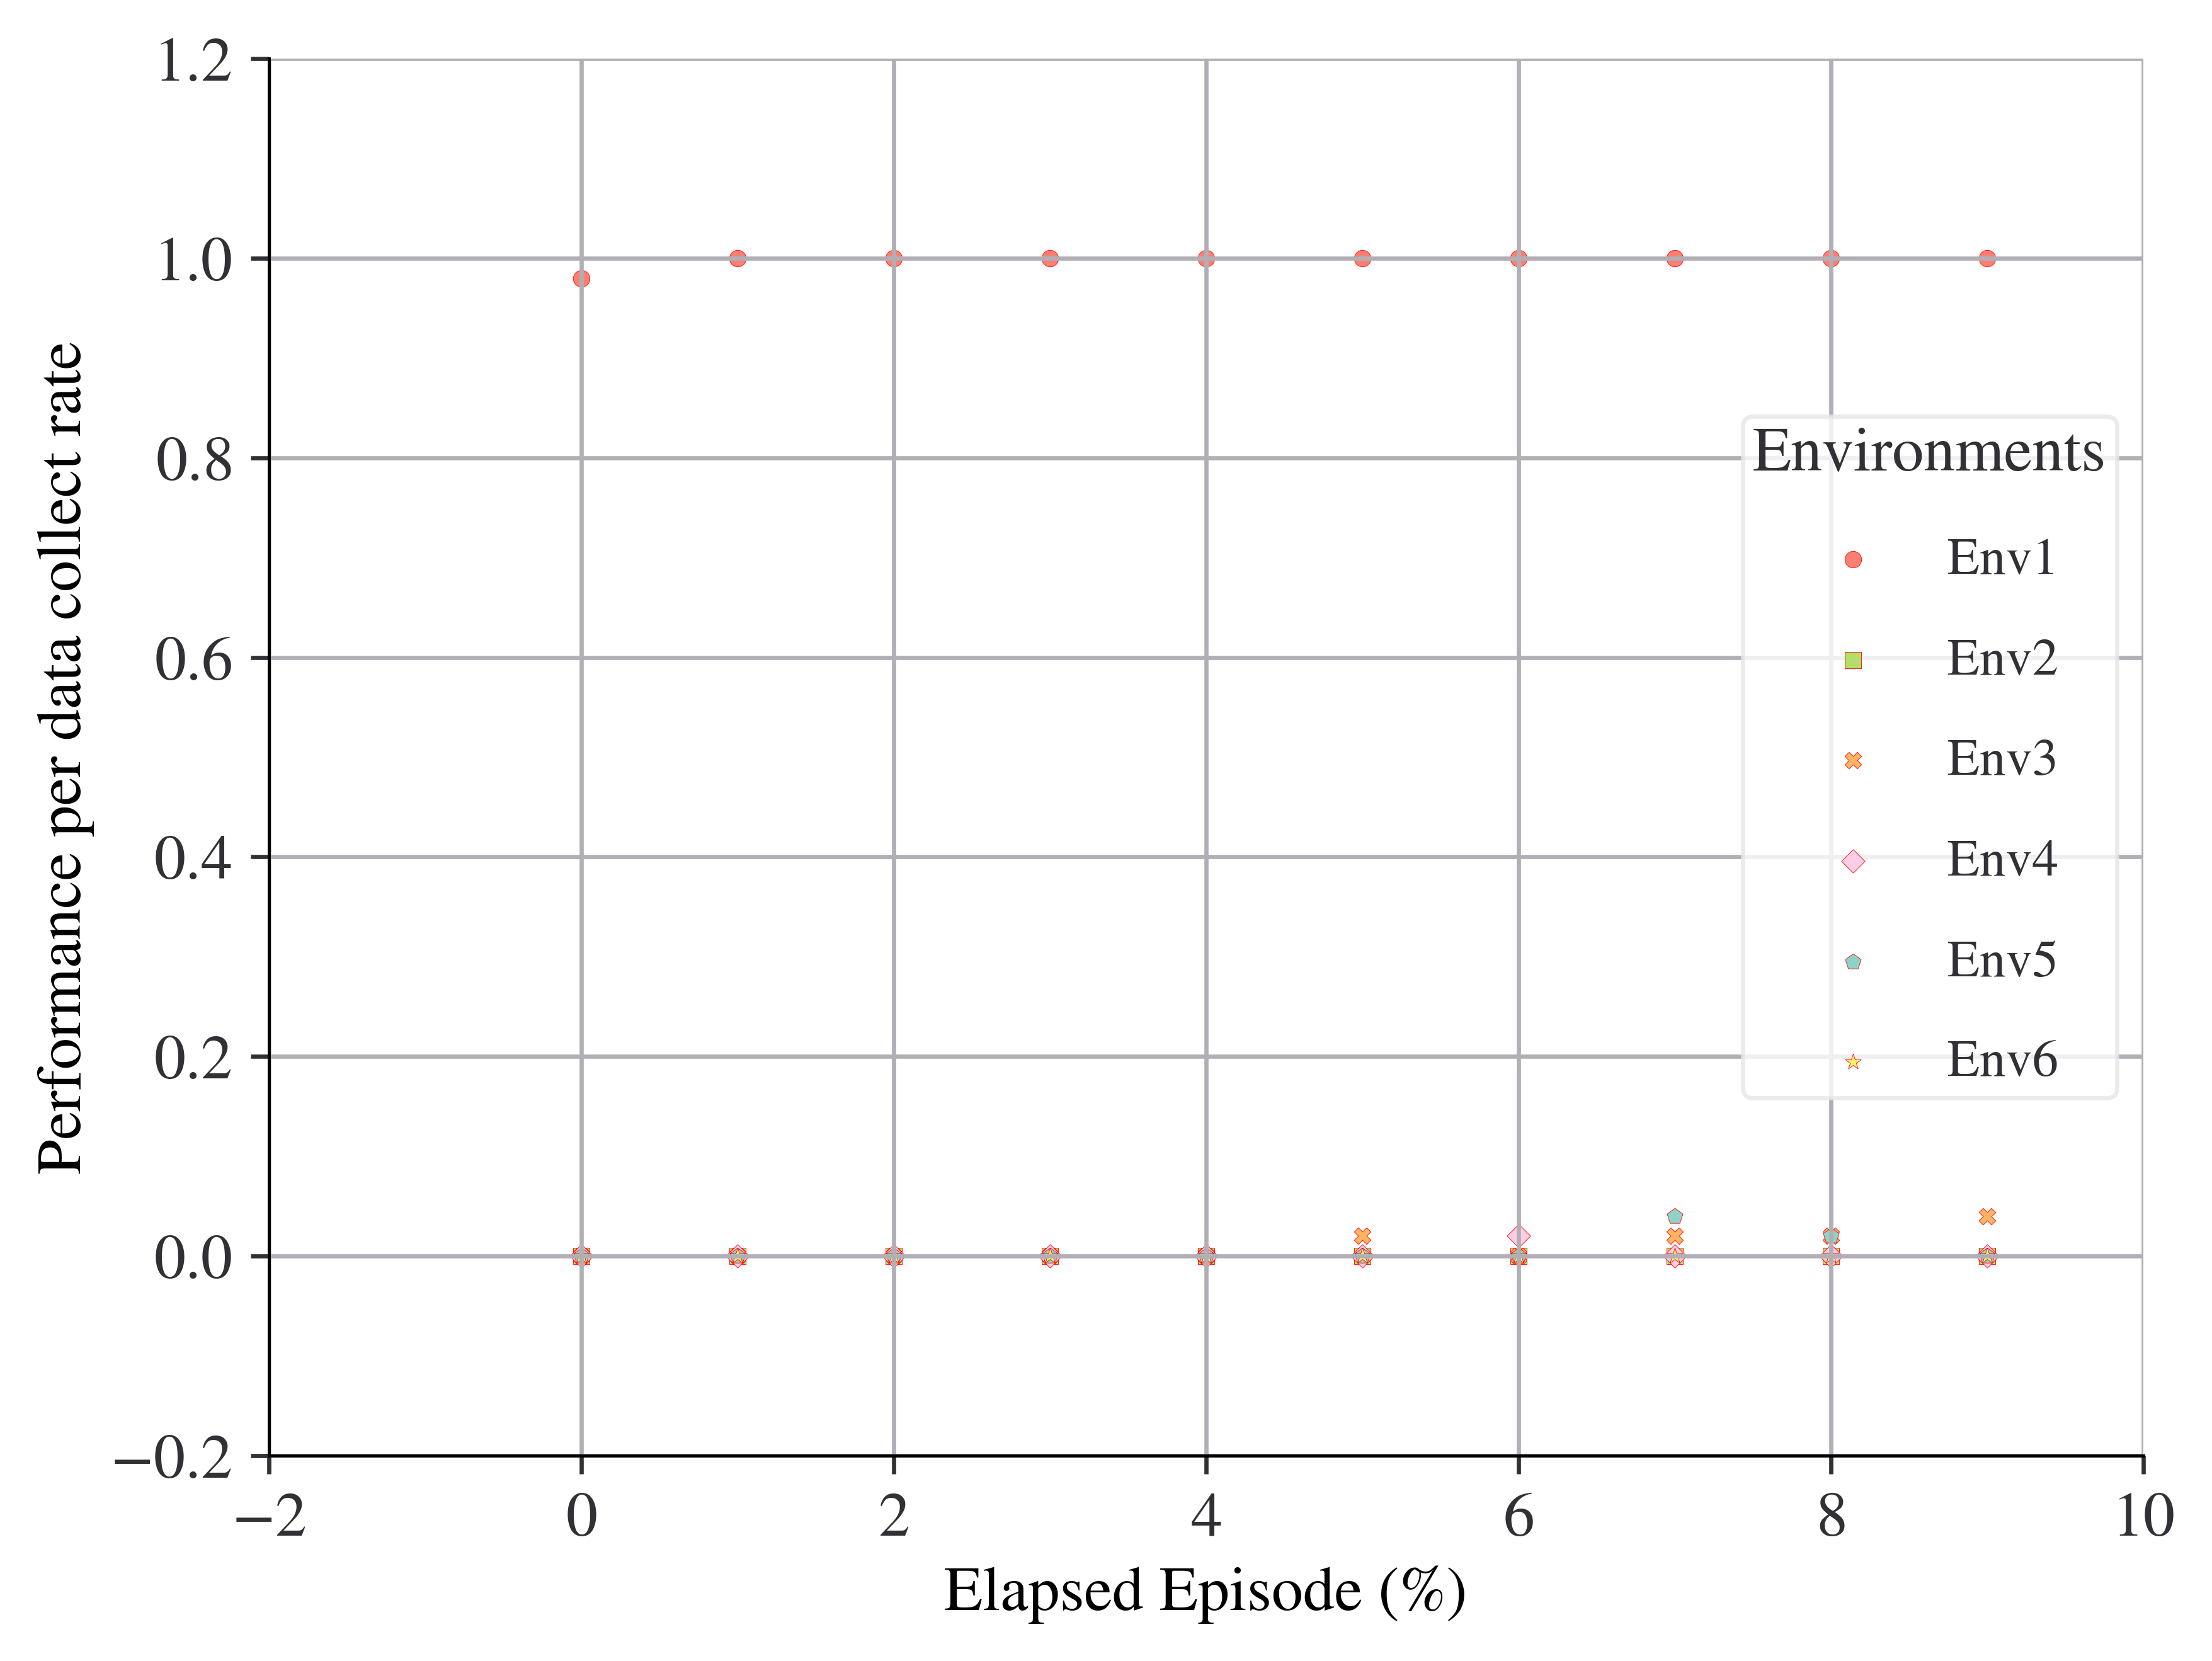

In [44]:
fig, ax = plt.subplots()

plt.style.use('plot_style.txt')

plt.scatter(data_points_array,success_list_1,c='C1',edgecolor ="red",linewidths=0.1,marker='o',s=10, alpha=1,label='Env1')
plt.scatter(data_points_array,success_list_2,c='C2',edgecolor ="red",linewidths=0.1,marker='s',s=10, alpha=1,label='Env2')
plt.scatter(data_points_array,success_list_3,c='C3',edgecolor ="red",linewidths=0.1,marker='X',s=10, alpha=1,label='Env3')
plt.scatter(data_points_array,success_list_4,c='C4',edgecolor ="red",linewidths=0.1,marker='D',s=10, alpha=1,label='Env4')
plt.scatter(data_points_array,success_list_5,c='C5',edgecolor ="red",linewidths=0.1,marker='p',s=10, alpha=1,label='Env5')
plt.scatter(data_points_array,success_list_6,c='C6',edgecolor ="red",linewidths=0.1,marker='*',s=10, alpha=1,label='Env6')


plt.xlabel('Elapsed Episode (%)')
plt.ylabel('Performance per data collect rate')

leg = ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Environments')

plt.grid()
plt.show()


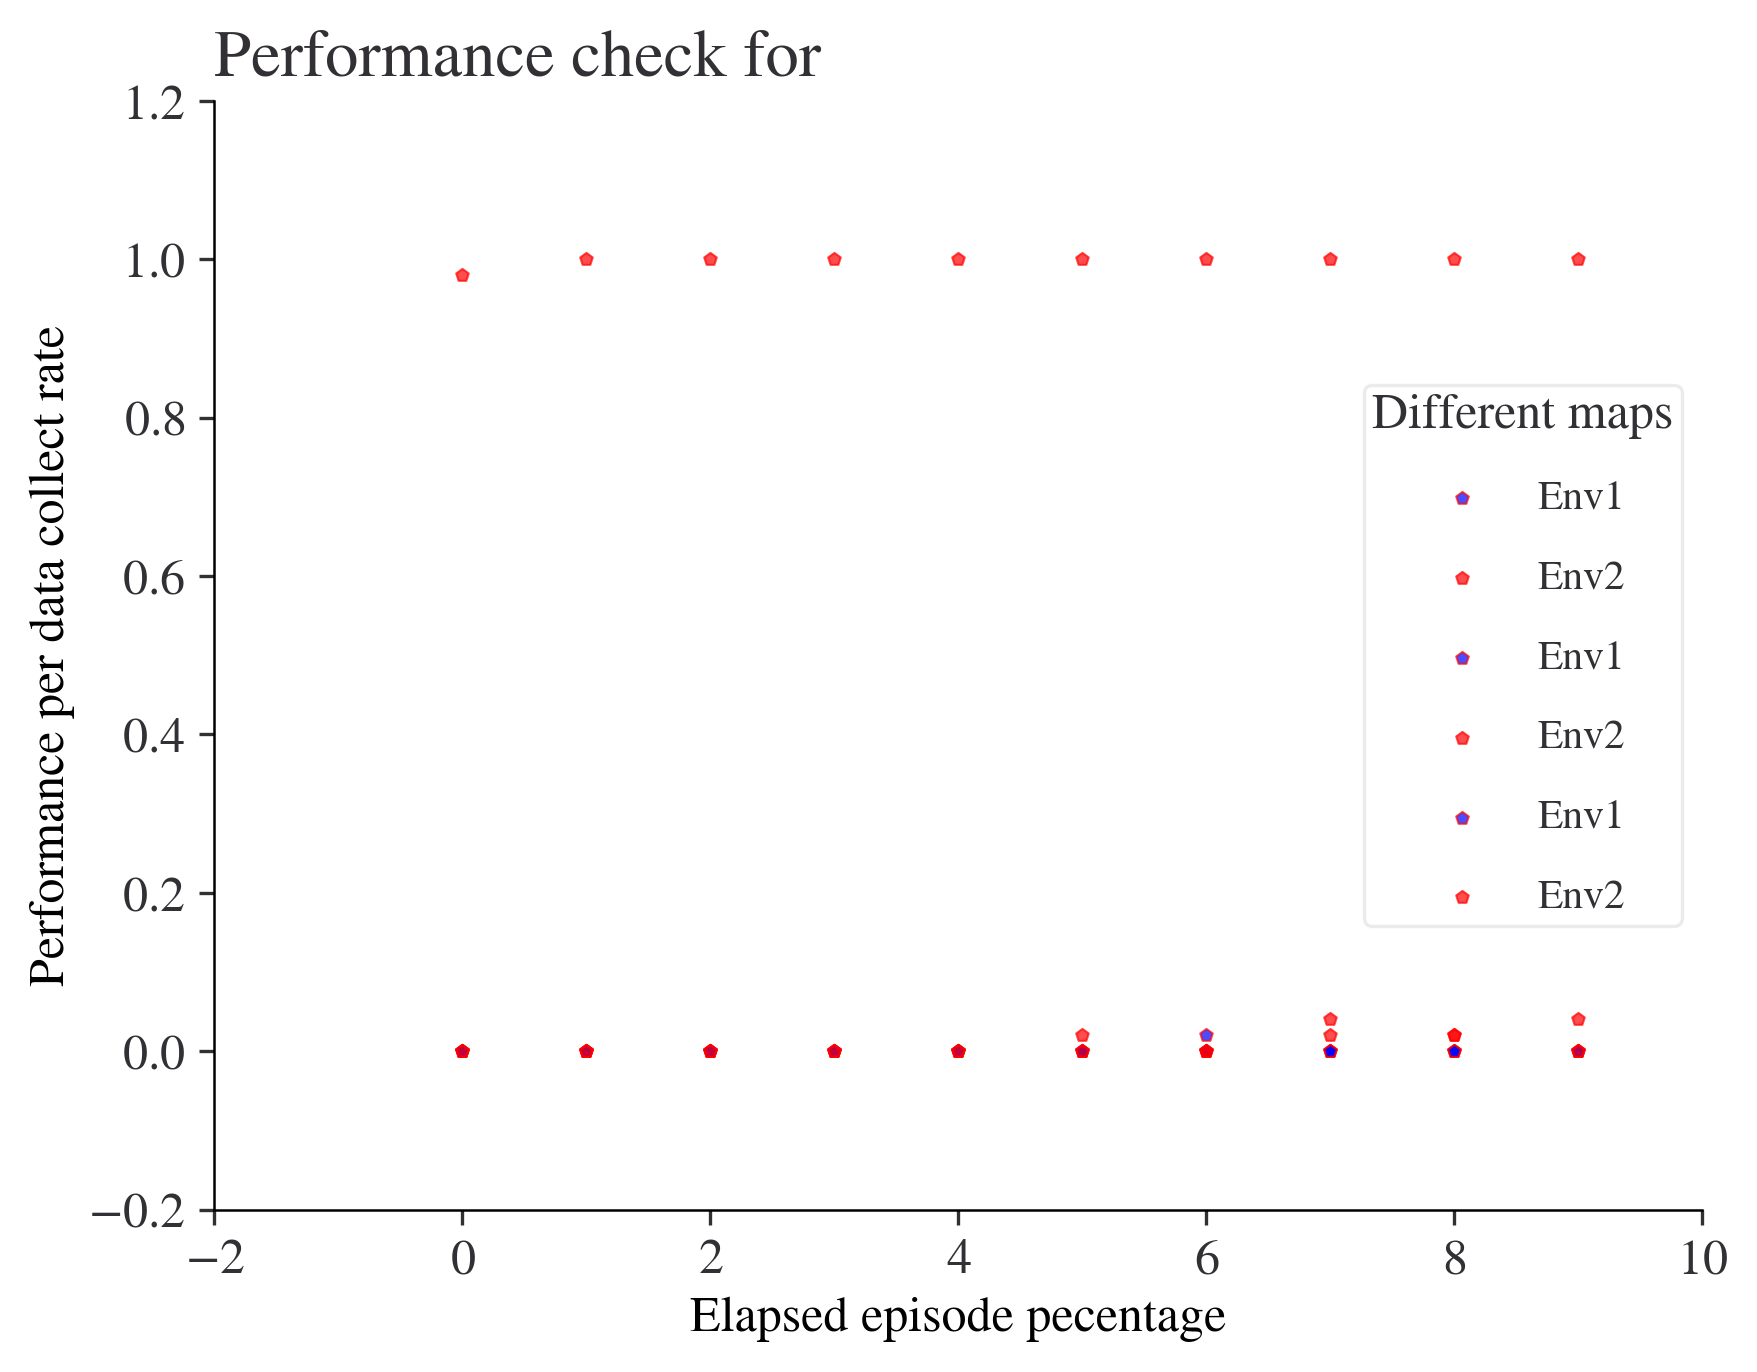

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl

data_points = max_ep/data_collect
data_points_array = np.array(list(range(0,int(data_points))))

plt.style.use('plot_style.txt')

fig, ax = plt.subplots()

plt.scatter(data_points_array,success_list_6,c='b',edgecolor ="red",linewidths=0.5,marker='p',s=10, alpha=0.7,label='Env1')
plt.scatter(data_points_array,success_list_1,c='r',edgecolor ="red",linewidths=0.5,marker='p',s=10, alpha=0.7,label='Env2')
plt.scatter(data_points_array,success_list_2,c='b',edgecolor ="red",linewidths=0.5,marker='p',s=10, alpha=0.7,label='Env1')
plt.scatter(data_points_array,success_list_3,c='r',edgecolor ="red",linewidths=0.5,marker='p',s=10, alpha=0.7,label='Env2')
plt.scatter(data_points_array,success_list_4,c='b',edgecolor ="red",linewidths=0.5,marker='p',s=10, alpha=0.7,label='Env1')
plt.scatter(data_points_array,success_list_5,c='r',edgecolor ="red",linewidths=0.5,marker='p',s=10, alpha=0.7,label='Env2')

plt.title('Performance check for')
plt.xlabel('Elapsed episode pecentage')
plt.ylabel('Performance per data collect rate')

leg = ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Different maps')
plt.show()

ValueError: 'data collection rate' is not a valid value for loc; supported values are 'left', 'center', 'right'

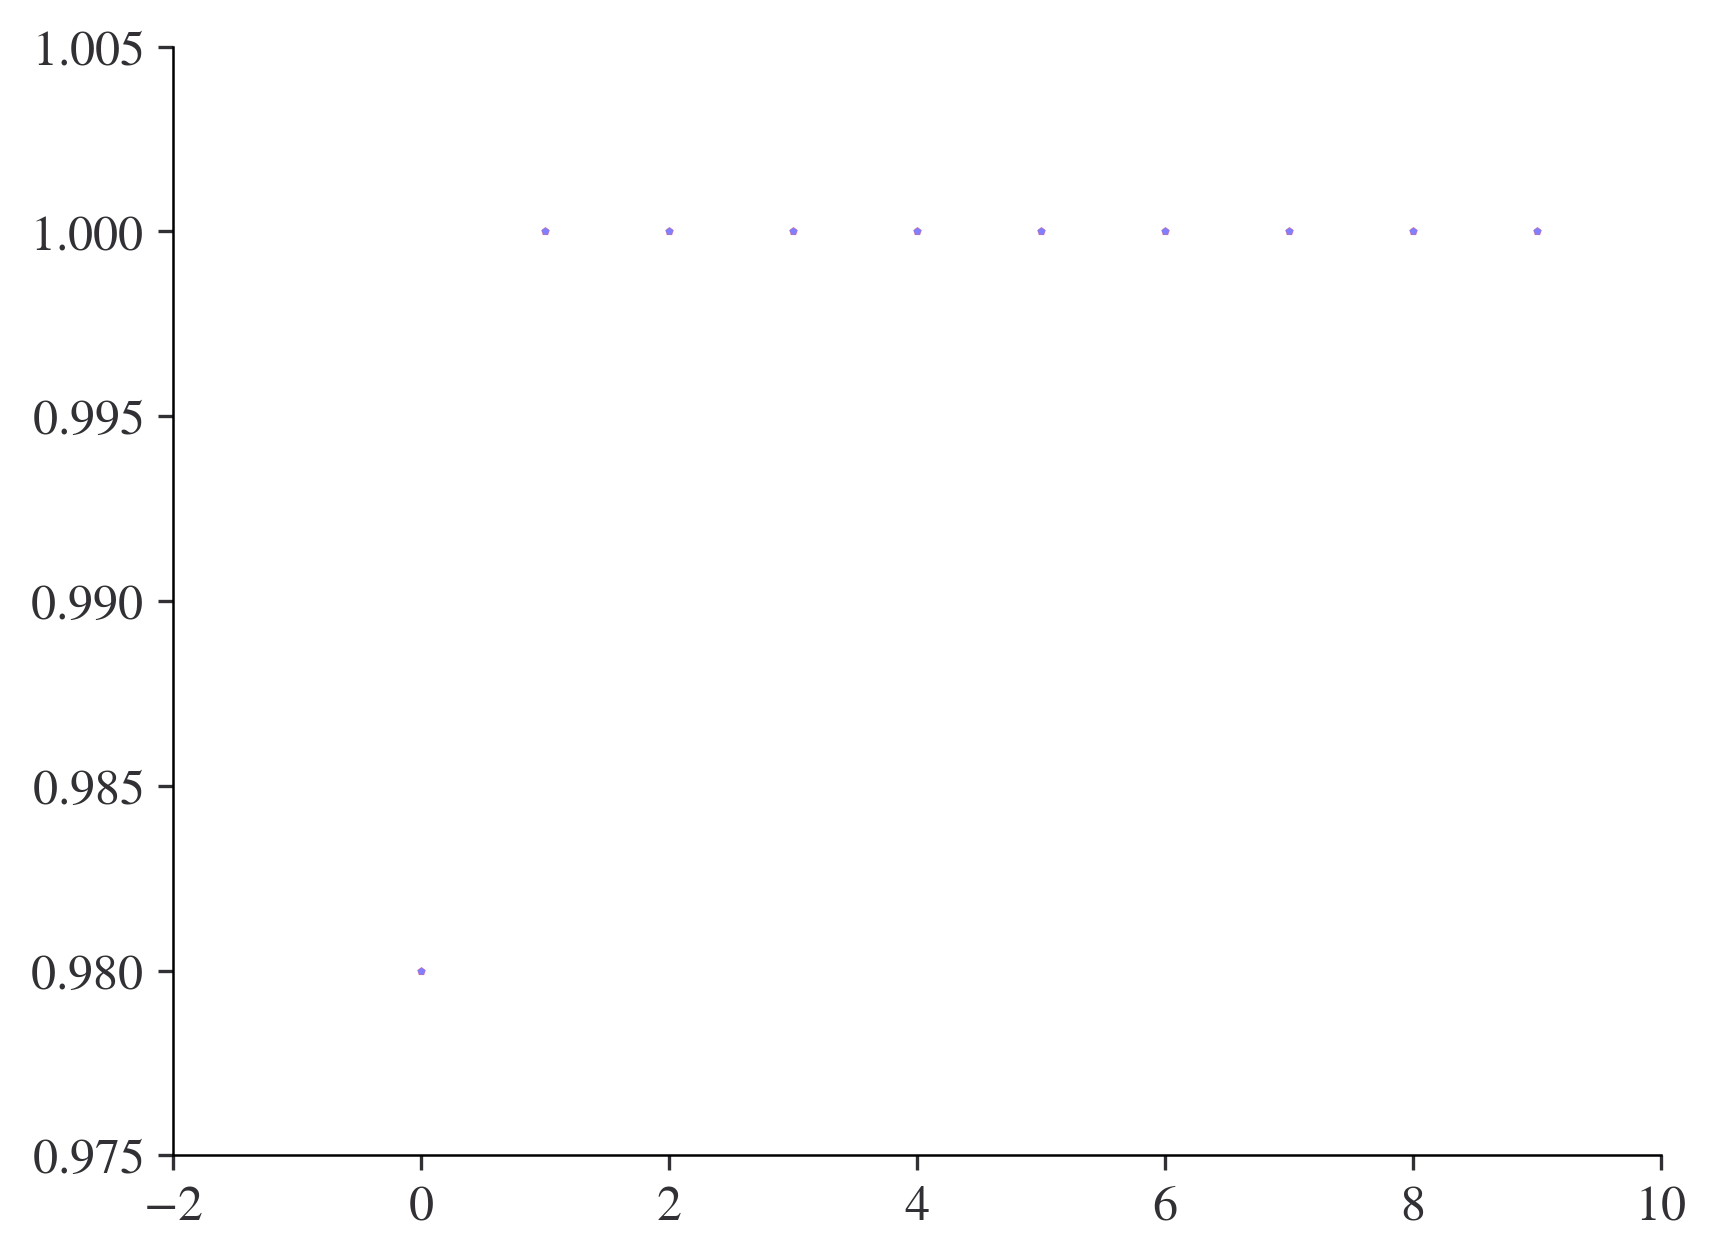

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

data_points = max_ep/data_collect
data_points_array = np.array(list(range(0,int(data_points))))

plt.scatter(data_points_array,success_list_1,c='b',edgecolor ="red",linewidths=0.1,marker='p',s=4, alpha=0.5)

plt.title('Performance check for',max_ep,'Data collection rate',data_collect)
plt.xlabel('Elapsed episode pecentage')
plt.ylabel('Performance per data collect rate')

plt.show()


In [14]:
def Q_policy(env,qtable,ep):
    env.reset()

    for episode in range(ep):
        state = env.reset()
        step = 0
        done = False
        print("****************************************************")
        print("EPISODE ", episode)

        for step in range(ep):
            #env.render()
            # Take the action (index) that have the maximum expected future reward given that state
            action = np.argmax(qtable[state,:])
            
            new_state, reward, done, info = env.step(action)
            
            if done:
                break
            state = new_state
    #env.close()

In [19]:
Q_policy(env,qtable,ep = 1000)

****************************************************
EPISODE  0


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices